In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten,BatchNormalization, Conv2D , MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
%matplotlib inline

In [2]:
os.chdir('/Users/mohammedshabo/Desktop/project/corona_dataset')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    
    
for c in random.sample(glob.glob('cat*'),200):
    shutil.move(c, 'train/cat' )
for c in random.sample(glob.glob('dog*'),200):
    shutil.move(c,'train/dog')
for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'valid/cat')
for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'valid/dog')
for c in random.sample(glob.glob('cat*'),20):
    shutil.move(c,'test/cat')
for c in random.sample(glob.glob('dog*'),20):
    shutil.move(c,'test/dog')
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mohammedshabo/Desktop/project/corona_dataset'

In [2]:
os.chdir('../../')
train_path = '/Users/mohammedshabo/downloads/dataset/training_set/train'
valid_path = '/Users/mohammedshabo/downloads/dataset/training_set/valid'
test_path = '/Users/mohammedshabo/downloads/dataset/training_set/test'


In [3]:
 
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
     
validation_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
     
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10, shuffle=False)

Found 1600 images belonging to 2 classes.
Found 799 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [4]:
images , labels = next(train_batches)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


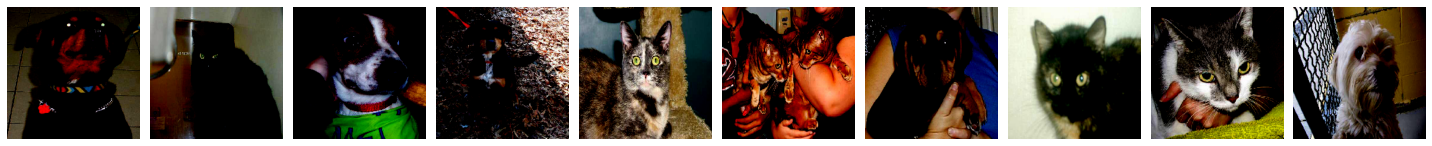

In [6]:
plotImages(images)
print(labels)

In [23]:
model = tf.keras.applications.resnet_v2.ResNet50V2()

In [24]:
#model = Sequential([
    
   # Conv2D(filters=32 , kernel_size=(3,3) , activation='relu', padding = 'same' , input_shape=(224,224,3)),
    #MaxPool2D(pool_size=(2,2),strides=2),
    #Conv2D(filters=64 , kernel_size=(3,3) , activation='relu', padding = 'same' ),
   # MaxPool2D(pool_size=(2,2),strides=2),
    #Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu' , padding = 'same'),
    #MaxPool2D(pool_size = (2,2), strides = 2),
    #Flatten(),
a = model.layers[-2].output
b = Dense(units = 32 , activation ='relu')(a)
o =  Dense(units = 2, activation='sigmoid')(b)
    
resnet = tf.keras.models.Model(inputs = model.input , outputs = o)
#])

In [25]:
resnet.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [26]:
for layer in resnet.layers[:-3]:
    
    layer.trainable =False

In [27]:
resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
resnet.fit(x=train_batches ,validation_data = validation_batches , epochs =3)

Epoch 1/3


2022-07-01 18:47:46.376230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.9400

2022-07-01 18:48:01.918376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 24s 143ms/step - loss: 0.2326 - accuracy: 0.9400 - val_loss: 0.0907 - val_accuracy: 0.9762
Epoch 2/3
160/160 [==============================] - 22s 140ms/step - loss: 0.0587 - accuracy: 0.9881 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 3/3
160/160 [==============================] - 22s 141ms/step - loss: 0.0370 - accuracy: 0.9925 - val_loss: 0.0580 - val_accuracy: 0.9837


In [31]:
test_loss, test_acc = resnet.evaluate(test_batches)
print(test_acc,test_loss)

12/12 [==============================] - 1s 94ms/step - loss: 0.0243 - accuracy: 1.0000
1.0 0.02432546392083168
